In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline


## RESULTS USING THE SIGNAL OF TRUNCATE

In [2]:
env='HalfCheetah-v4'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER-DDPG"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(1250, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

(1250, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,HalfCheetah-v4,12-07-2023 12:57:16,200,0,200,0.009941,1,201,False,-47.587241,-47.587241,-47.587241,-47.587241,-47.587241,COMPER-DDPG
1,1,2,HalfCheetah-v4,12-07-2023 13:02:21,400,0,400,0.019882,1,401,False,-127.873575,-87.730408,-87.730408,-87.730408,-87.730408,COMPER-DDPG
2,1,3,HalfCheetah-v4,12-07-2023 13:07:28,600,0,600,0.029822,1,601,False,-173.232594,-116.231136,-116.231136,-116.231136,-116.231136,COMPER-DDPG
3,1,4,HalfCheetah-v4,12-07-2023 13:12:39,800,0,800,0.039763,1,801,False,-250.682174,-149.843896,-149.843896,-149.843896,-149.843896,COMPER-DDPG
4,1,5,HalfCheetah-v4,12-07-2023 13:17:53,1000,0,1000,0.049704,1,1001,True,-341.574652,-188.190047,-188.190047,-188.190047,-188.190047,COMPER-DDPG


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,HalfCheetah-v4,11-07-2023 23:14:47,200,201,0,0.009941,1,201,False,-107.578525,-107.578525,-107.578525,-107.578525,-107.578525,DDPG
1,1,2,HalfCheetah-v4,11-07-2023 23:15:05,400,401,0,0.019882,1,401,False,-134.729259,-121.153892,-121.153892,-121.153892,-121.153892,DDPG
2,1,3,HalfCheetah-v4,11-07-2023 23:15:23,600,601,0,0.029822,1,601,False,-141.262717,-127.856834,-127.856834,-127.856834,-127.856834,DDPG
3,1,4,HalfCheetah-v4,11-07-2023 23:15:42,800,801,0,0.039763,1,801,False,-194.780773,-144.587818,-144.587818,-144.587818,-144.587818,DDPG
4,1,5,HalfCheetah-v4,11-07-2023 23:16:00,1000,1001,0,0.049704,1,1001,True,-235.623996,-162.795054,-162.795054,-162.795054,-162.795054,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,HalfCheetah-v4,12-07-2023 12:57:16,200,0,200,0.009941,1,201,False,-47.587241,-47.587241,-47.587241,-47.587241,-47.587241,COMPER-DDPG
1,1,2,HalfCheetah-v4,12-07-2023 13:02:21,400,0,400,0.019882,1,401,False,-127.873575,-87.730408,-87.730408,-87.730408,-87.730408,COMPER-DDPG
2,1,3,HalfCheetah-v4,12-07-2023 13:07:28,600,0,600,0.029822,1,601,False,-173.232594,-116.231136,-116.231136,-116.231136,-116.231136,COMPER-DDPG
3,1,4,HalfCheetah-v4,12-07-2023 13:12:39,800,0,800,0.039763,1,801,False,-250.682174,-149.843896,-149.843896,-149.843896,-149.843896,COMPER-DDPG
4,1,5,HalfCheetah-v4,12-07-2023 13:17:53,1000,0,1000,0.049704,1,1001,True,-341.574652,-188.190047,-188.190047,-188.190047,-188.190047,COMPER-DDPG


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
245,5,246,HalfCheetah-v4,12-07-2023 06:42:45,49200,49201,0,0.999,50,201,False,322.306568,436.035379,850.531087,926.720985,1164.336690,DDPG
246,5,247,HalfCheetah-v4,12-07-2023 06:43:10,49400,49401,0,0.999,50,401,False,505.633415,436.317152,849.388155,936.114046,1147.496914,DDPG
247,5,248,HalfCheetah-v4,12-07-2023 06:43:36,49600,49601,0,0.999,50,601,False,851.845264,437.992669,848.164624,945.389117,1141.291788,DDPG
248,5,249,HalfCheetah-v4,12-07-2023 06:44:01,49800,49801,0,0.999,50,801,False,1380.908361,441.779479,849.106424,956.668167,1158.267116,DDPG
249,5,250,HalfCheetah-v4,12-07-2023 06:44:26,50000,50001,0,0.999,50,1001,True,1770.345873,447.093744,851.069326,968.031599,1170.947017,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

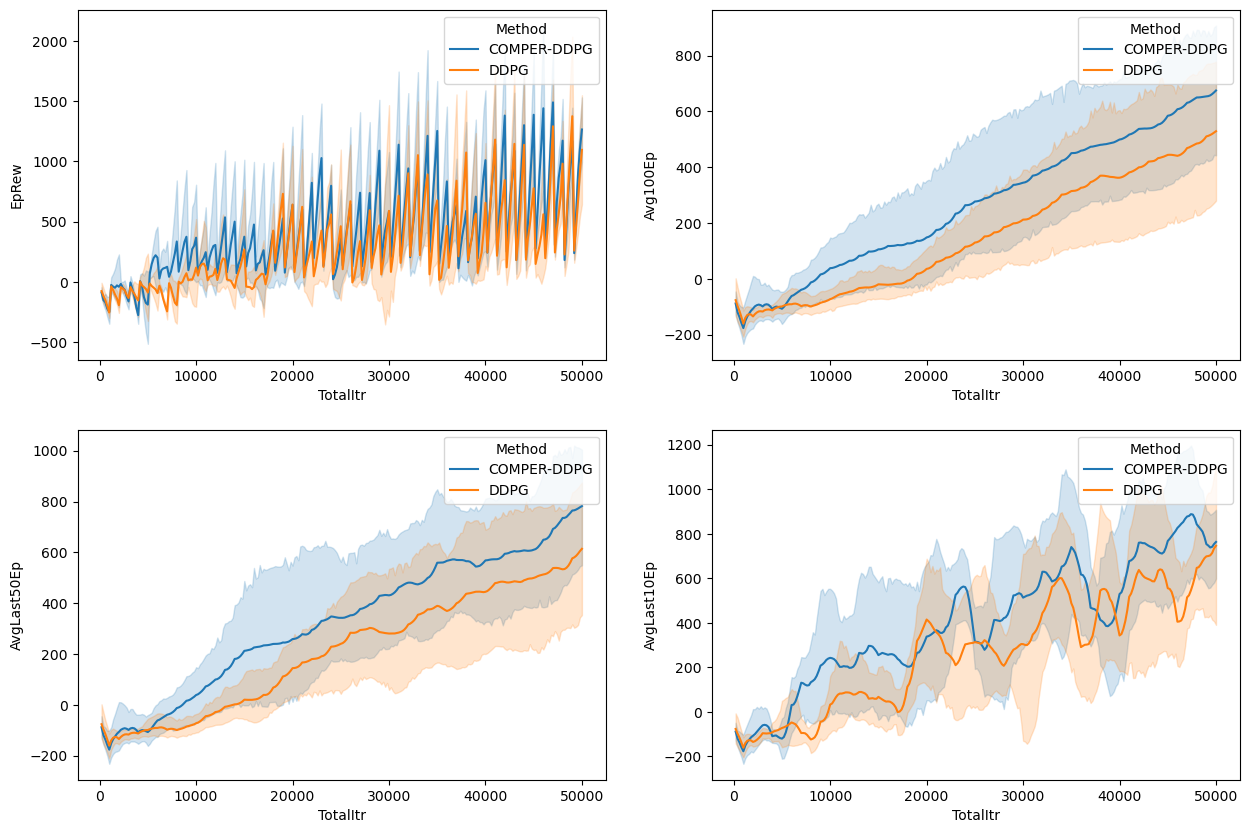

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER-DDPG"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,12-07-2023 15:02:38,HalfCheetah-v4,5000,0.672154,COMPER-DDPG
1,1,12-07-2023 17:14:45,HalfCheetah-v4,10000,0.626019,COMPER-DDPG
2,1,12-07-2023 19:26:47,HalfCheetah-v4,15000,0.099893,COMPER-DDPG
3,1,12-07-2023 21:39:23,HalfCheetah-v4,20000,-1.809298,COMPER-DDPG
4,1,12-07-2023 23:48:44,HalfCheetah-v4,25000,1.003056,COMPER-DDPG


In [10]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,11-07-2023 23:22:27,HalfCheetah-v4,5000,0.819138,DDPG
1,1,11-07-2023 23:30:24,HalfCheetah-v4,10000,-0.516756,DDPG
2,1,11-07-2023 23:38:41,HalfCheetah-v4,15000,2.751040,DDPG
3,1,11-07-2023 23:47:16,HalfCheetah-v4,20000,-0.152538,DDPG
4,1,11-07-2023 23:56:10,HalfCheetah-v4,25000,-1.204190,DDPG


In [11]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])

<Axes: xlabel='Int', ylabel='EvalAvgRew'>

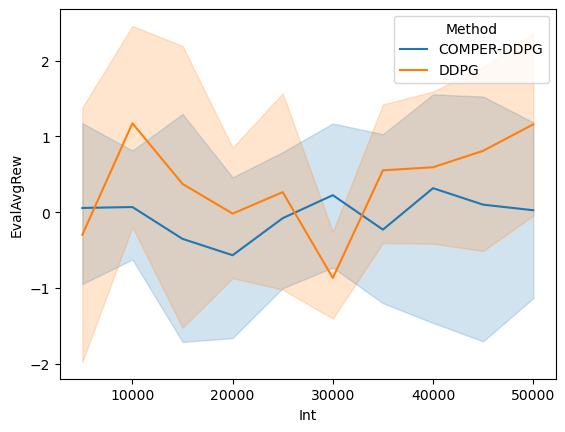

In [12]:
sns.lineplot(data=df_eval, x="Int", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [13]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,617.479378,COMPER-DDPG,39.290521
100,20200,-74.797766,COMPER-DDPG,39.018416
101,20400,-97.147400,COMPER-DDPG,39.325678
102,20600,17.237824,COMPER-DDPG,41.230382
103,20800,141.170824,COMPER-DDPG,45.148912


In [14]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,884.754076,DDPG,56.743592
100,20200,105.269417,DDPG,58.872071
101,20400,346.387426,DDPG,63.683238
102,20600,492.703579,DDPG,70.022901
103,20800,587.328692,DDPG,77.843996


In [15]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,20000,617.479378,COMPER-DDPG,39.290521
100,20200,-74.797766,COMPER-DDPG,39.018416
101,20400,-97.147400,COMPER-DDPG,39.325678
102,20600,17.237824,COMPER-DDPG,41.230382
103,20800,141.170824,COMPER-DDPG,45.148912


In [16]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
245,49200,322.306568,DDPG,850.531087
246,49400,505.633415,DDPG,849.388155
247,49600,851.845264,DDPG,848.164624
248,49800,1380.908361,DDPG,849.106424
249,50000,1770.345873,DDPG,851.069326


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

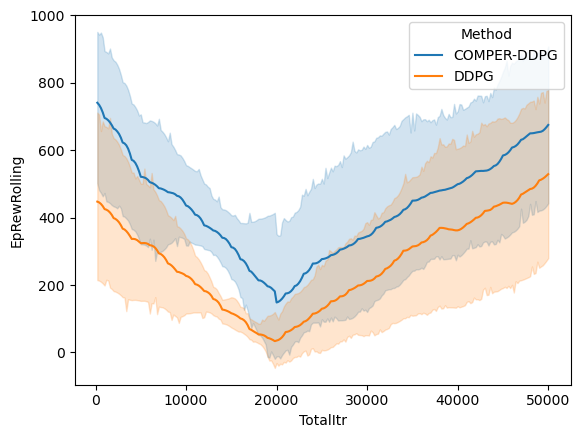

In [17]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [18]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,0.626019,COMPER-DDPG,0.649086
2,15000,0.099893,COMPER-DDPG,0.362956
3,20000,-1.809298,COMPER-DDPG,-0.854703
4,25000,1.003056,COMPER-DDPG,-0.403121
5,30000,1.876570,COMPER-DDPG,1.439813


In [19]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.516756,DDPG,0.151191
2,15000,2.751040,DDPG,1.117142
3,20000,-0.152538,DDPG,1.299251
4,25000,-1.204190,DDPG,-0.678364
5,30000,-1.659774,DDPG,-1.431982


<Axes: xlabel='Int', ylabel='EpRewRolling'>

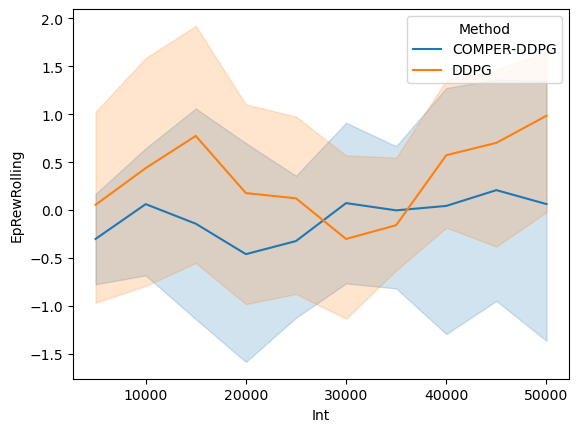

In [20]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

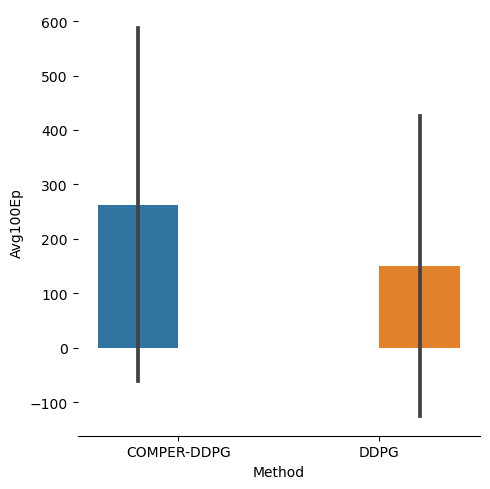

In [21]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

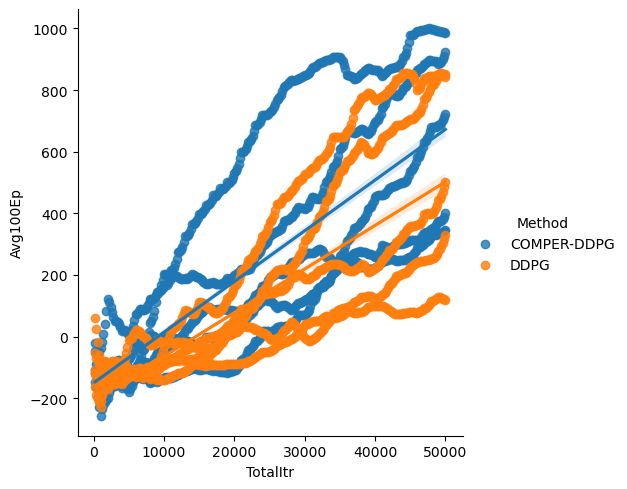

In [22]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)